# Import necessary libraries

In [1]:
# Imports
import numpy as np 

# Create a dual purpose sigmoid function that also returns a derivative

In [2]:
# sigmoid function that also calculates the derivative
def sigmoid(x, deriv = False): 
    if (deriv == False):
        return 1/(1 + np.exp(-x)) 
    else:
        return x * (1 - x)

# Diagram of network structure and matrices

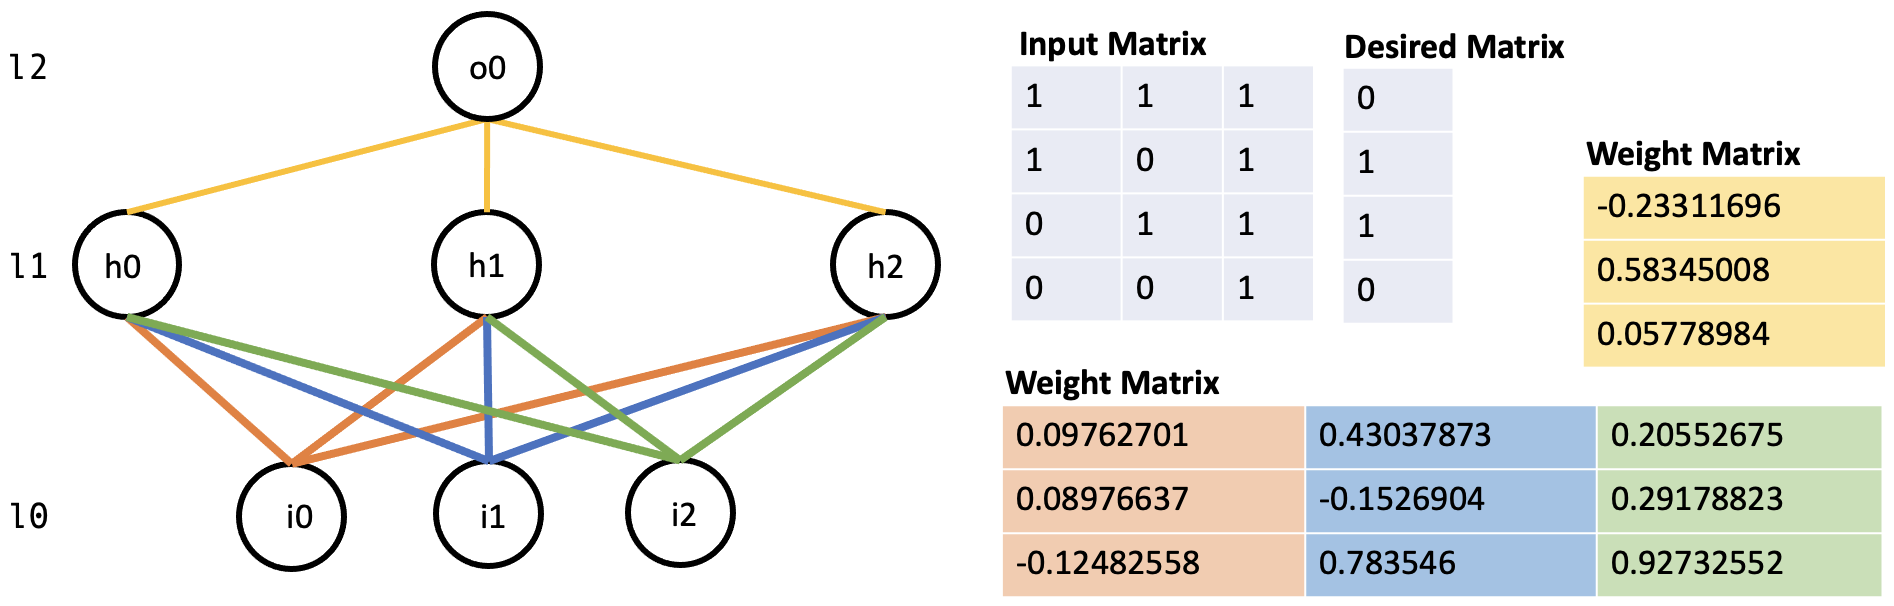

# Setup the input and desired output matrices

In [3]:
# Input matrix
X = np.array([[1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 1]]) 
# Output matrix (Desired outputs)
y = np.array([[0], [1], [1], [0]]) 
print("Inputs\n", X)
print("Desired\n", y)

Inputs
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 1]]
Desired
 [[0]
 [1]
 [1]
 [0]]


# Setup weight matrices

In [25]:
# Define the learning rate 
lr = 0.2

# Fix the seed for the random number
# generation to aid in debugging.
# Remove for normal operation
np.random.seed(0)

# Initialise weights with values between -1 and 1
w0 = 2*np.random.random((3, 3)) - 1
w1 = 2*np.random.random((3, 1)) - 1
print("w0\n", w0)
print("w1\n", w1)

w0
 [[ 0.09762701  0.43037873  0.20552675]
 [ 0.08976637 -0.1526904   0.29178823]
 [-0.12482558  0.783546    0.92732552]]
w1
 [[-0.23311696]
 [ 0.58345008]
 [ 0.05778984]]


# Train the network (adjust weights using gradient descent)

In [26]:
# Define the number of epochs (presentations of the training data)
epochs = 5000
# Train the model using Backpropagation (gradient descent)
# l0 is the input layer
# l1 is the hidden layer
# l2 is the output layer
for epoch in range(epochs): 
    # Propagate values forward
    # Load the input layer
    l0 = X 
    # Calculate weighted sum for hidden layer
    l1 = sigmoid(np.dot(l0, w0)) 
    # Calculate weighted sum for output layer
    l2 = sigmoid(np.dot(l1, w1)) 

    # Compute the error on output layer (Desired - actual)
    l2_error = y - l2 
    # l2 deltas will be the error on each node * derivative of node value
    l2_delta = l2_error * sigmoid(l2, deriv = True) 
    # Backpropagate the error*delta through the network 
    # to get the errors for the hidden layer nodes
    # The multiplication of two matrices involves dot 
    # products between the first matrix row and the 
    # columns of the second matrix. Therefore, we need to
    # transpose w1 for it to have the correct shape
    l1_error = l2_delta.dot(w1.T) 
    # l1 deltas will be the error on each node * derivative of node value
    l1_delta = l1_error * sigmoid(l1, deriv = True) 
  
    # Update weights
    # new_weight = old_weight + (error * input * learning_rate)
    w1 += l1.T.dot(l2_delta) * lr
    w0 += l0.T.dot(l1_delta) * lr

# Run the network

In [29]:
# Test the network - feed patterns forward to output layer
l0 = X 
l1 = sigmoid(np.dot(l0, w0)) 
l2 = sigmoid(np.dot(l1, w1)) 
# Print the values obtained on the output layer with the adjusted weight values
print("Outputs\n", l2)
# Print the desired outputs for comparison
print("Desired\n", y)

Outputs
 [[0.09275683]
 [0.93774974]
 [0.90114472]
 [0.07968092]]
Desired
 [[0]
 [1]
 [1]
 [0]]
